# Wine-Quality

In this dataset we will predict the best wine quality using the Machine learning model

1. We will analyse the dataset we will do the EDA and feature engineering.

2. Removing outliers if any

3. Creating machine learning model and selecting the best one

4. Hypertuning the model

5. Saving the model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
winedf=pd.read_csv('winequality-red.csv')
winedf

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [3]:
winedf.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
winedf.shape

(1599, 12)

In [5]:
winedf.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
winedf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
numerical_col=[]
for i in winedf.dtypes.index:
    if winedf.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)

Numerical Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [9]:
winedf.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

key observation:
   
1. The  mean is more than median in all the columns
    
2. There is a large difference in 75% percentile and max in residual sugar, free sulfur oxide, total sulfur oxide
    
3. The 1 and 2 observation suggests that there are extreme outliers are present in these three columns

In [10]:
winedf.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Target variable is discrete and categoricaal in nature 
quality score range from 3 to 8:
where 3 is low quality and 8 is best

only scores obtained are between 3 to 8

In [11]:
winedf.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

observation:

quality has most value concentrated in the categories of 5,6,7

few observations are present in the categories in 3 and 8

# Data Visualizations

To check missing null values

In [12]:
winedf.isnull()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free sulfur dioxide  total sulfur dioxide  density     pH  sulphates  \
0                   False                 False    False  False      False   
1                   False                 False    False  False      False   
2                   False                 False    False  False      False   
3                   False                 False    False  False      False   
4                   False                 False    False  False      False   
...                   ...                   ...      ...    ...        ...   
1594                False                 False    False  False      False   
1595                False                 False    False  False      False   
1596                False                 False    False  False      False   
1597                False                 False    False  False      False   
1598                False                 False    False  False      False   

      alcohol  quality  
0       False    False  
1       False    False  
2       False    False  
3       False    False  
4       False    False  
...       ...      ...  
1594    False    False  
1595    False    False  
1596    False    False  
1597    False    False  
1598    False    False  

[1599 rows x 12 columns]

In [13]:
winedf.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

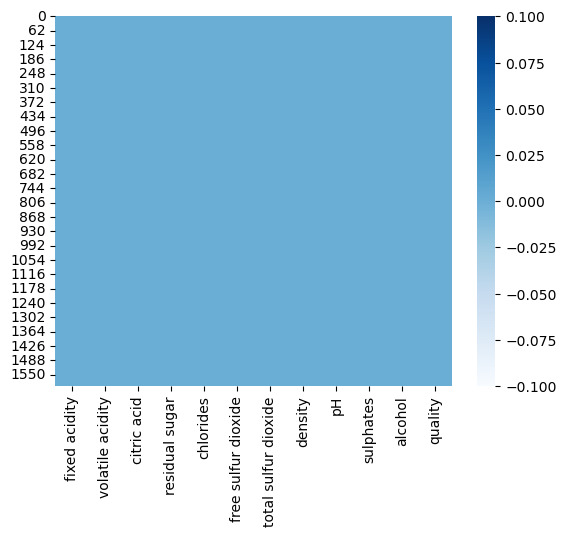

In [14]:
sns.heatmap(winedf.isnull(),cmap='Blues')

Obseravtions:
As we can see from the above heatmap no null values are there in the dataset.

In [15]:
dfcorr=winedf.corr()
dfcorr

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

<Axes: >

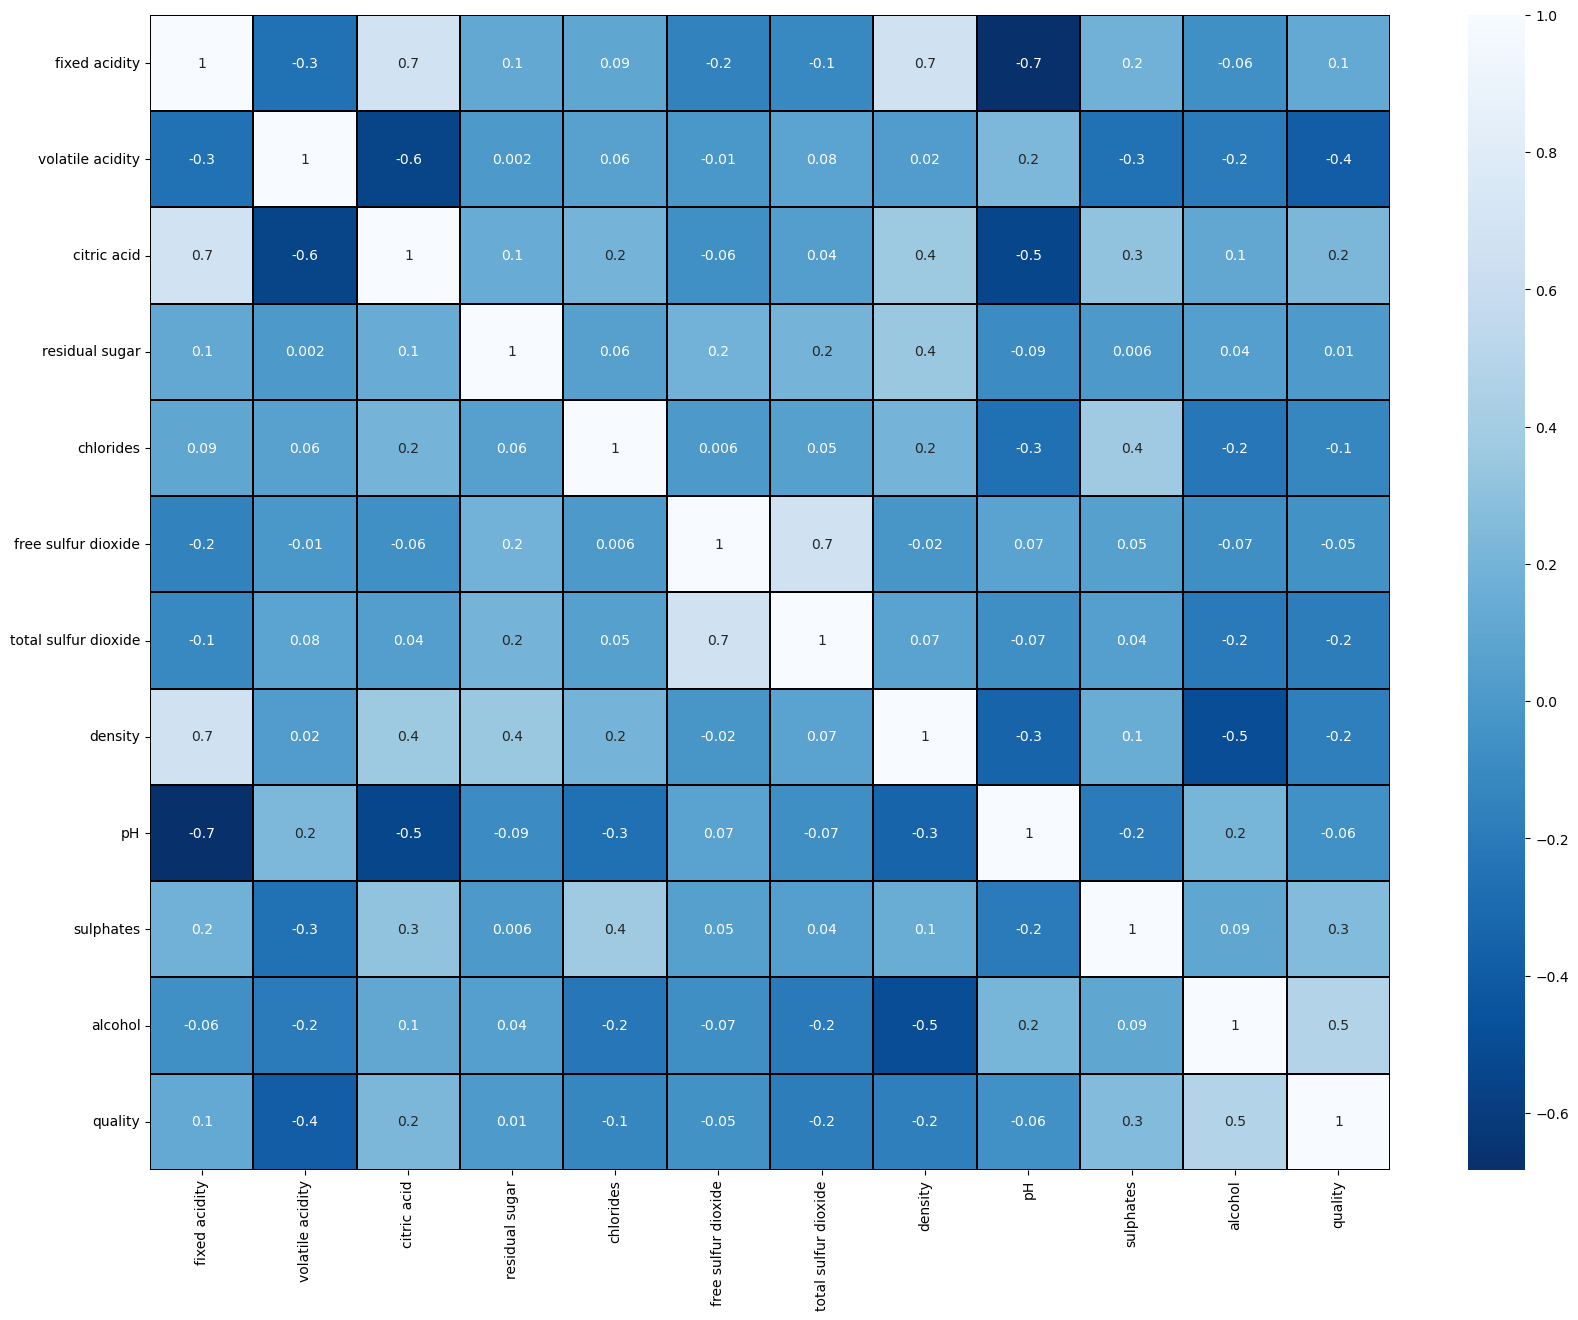

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(dfcorr,cmap='Blues_r',linewidth=0.1,linecolor='black',annot=True,fmt=".1g")

observations:
    
1. There is a positive correlation between the free sulfur oxide and total sulfur oxide

2. There is a negative correlation between the volatile acidity and citric acid

3. There is a positive correlation between the alcohol and quality

4. Alcohol impacting positive effect on the quality

5. Volatile acidity impacting negative effect on the quality and we can drop the volatile acidity column also.

Plotting outliers

In [17]:
winedf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<Axes: >

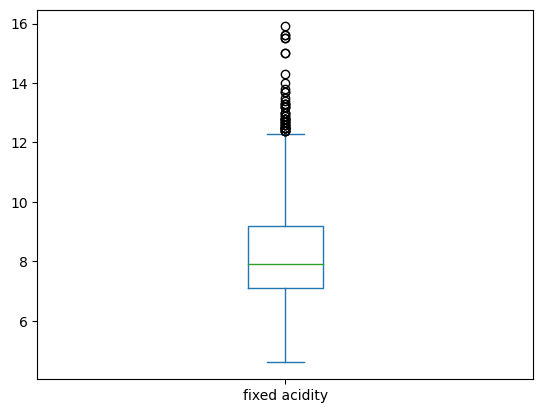

In [18]:
winedf['fixed acidity'].plot.box()

<Axes: >

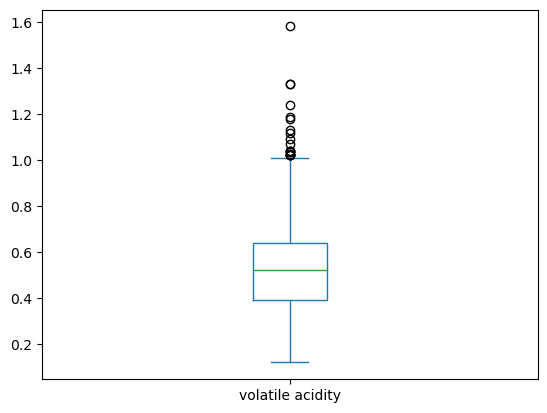

In [19]:
winedf['volatile acidity'].plot.box()

<Axes: >

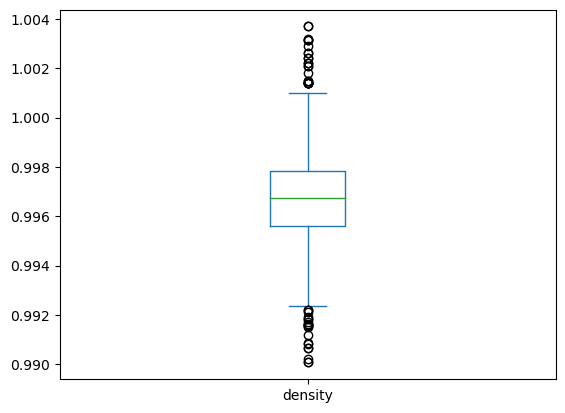

In [20]:
winedf['density'].plot.box()

fixed acidity              Axes(0.125,0.53;0.110714x0.35)
volatile acidity        Axes(0.257857,0.53;0.110714x0.35)
citric acid             Axes(0.390714,0.53;0.110714x0.35)
residual sugar          Axes(0.523571,0.53;0.110714x0.35)
chlorides               Axes(0.656429,0.53;0.110714x0.35)
free sulfur dioxide     Axes(0.789286,0.53;0.110714x0.35)
total sulfur dioxide       Axes(0.125,0.11;0.110714x0.35)
density                 Axes(0.257857,0.11;0.110714x0.35)
pH                      Axes(0.390714,0.11;0.110714x0.35)
sulphates               Axes(0.523571,0.11;0.110714x0.35)
alcohol                 Axes(0.656429,0.11;0.110714x0.35)
quality                 Axes(0.789286,0.11;0.110714x0.35)
dtype: object

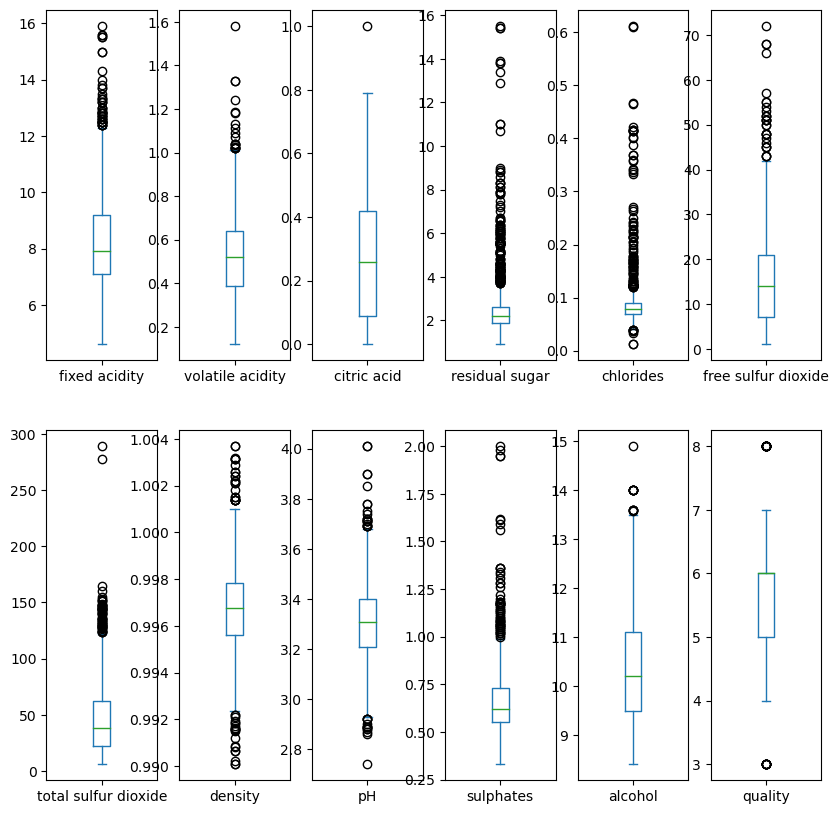

In [21]:
winedf.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

Obseravtions:
The outleirs are present in the volatile acidity,residual sugar,chlorides,free suphur dioxide, total sulphur dioxide,density,pH,sulphates,alcohol and quality

we can remove the outliers using zscore

# Univariate Analysis

To check Skewness

<Axes: xlabel='density', ylabel='Density'>

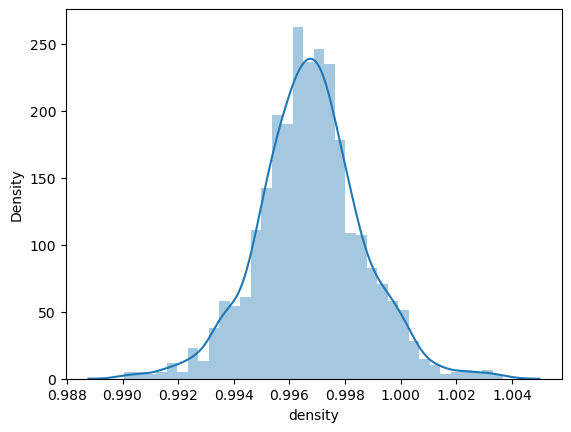

In [22]:
sns.distplot(winedf['density'])

<Axes: xlabel='citric acid', ylabel='Density'>

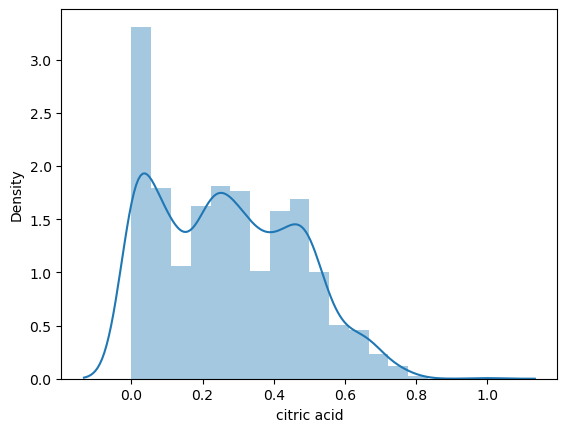

In [23]:
sns.distplot(winedf['citric acid'])

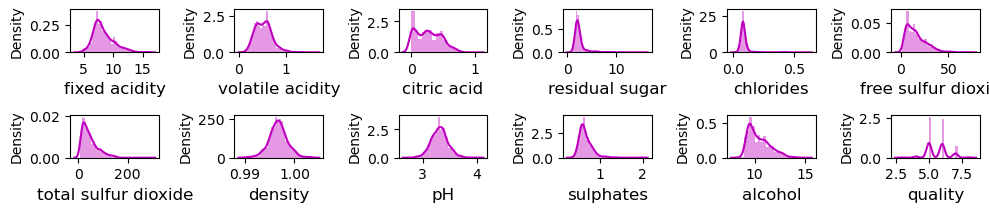

In [24]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in  numerical_col:
    if plotnumber<=12:
        ax=plt.subplot(6,6,plotnumber)
        sns.distplot(winedf[col],color='m')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

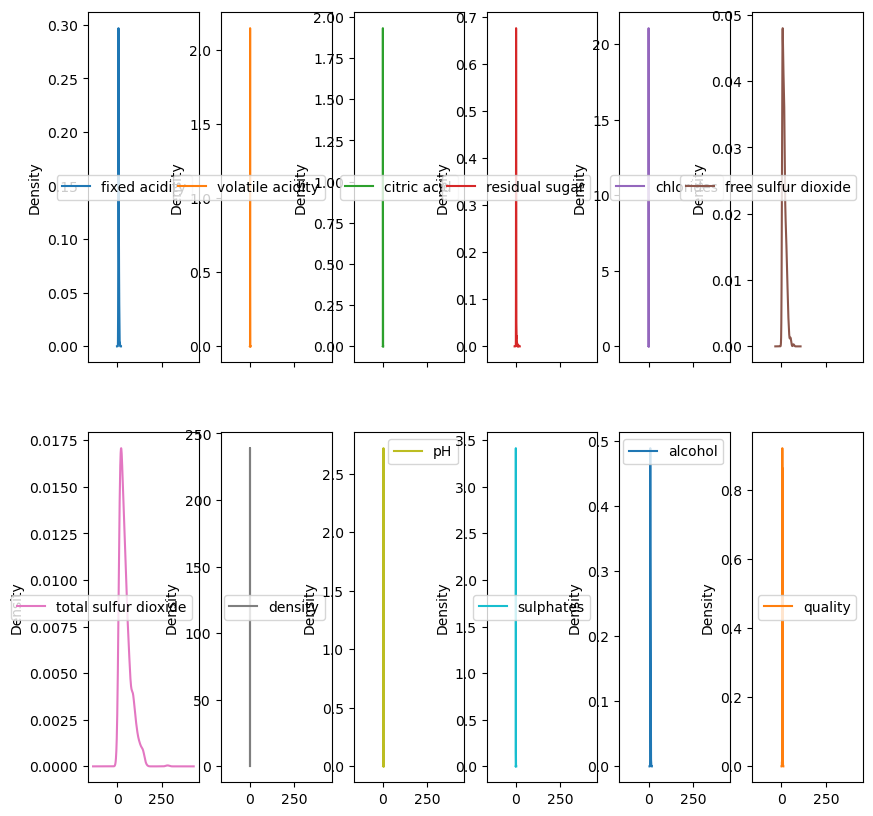

In [25]:
winedf.plot(kind='kde',subplots=True,layout=(2,6),figsize=(10,10))

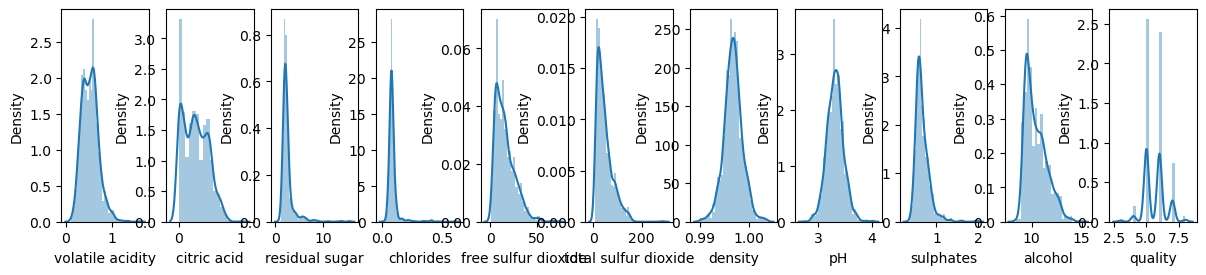

In [26]:
collist=winedf.columns.values
ncol=12
nrows=10

plt.figure(figsize=(16,16))
for i in range(1,len(winedf.columns.values)):
    plt.subplot(5,12,i+1)
    sns.distplot(winedf[collist[i]])

only density and pH is normal distributed

other variables are right skewed/positively skewed

# Bivariate Analysis

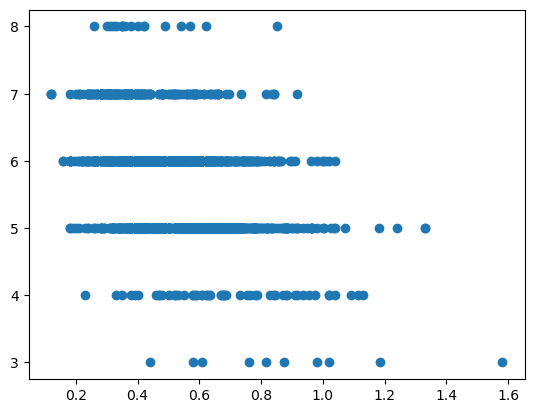

In [27]:
plt.scatter(winedf['volatile acidity'],winedf['quality'])
plt.show()

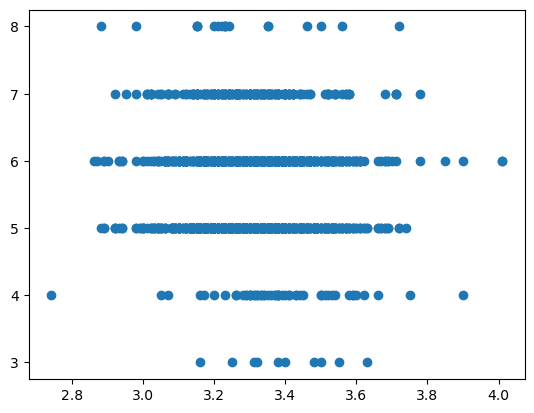

In [28]:
plt.scatter(winedf['pH'],winedf['quality'])
plt.show()

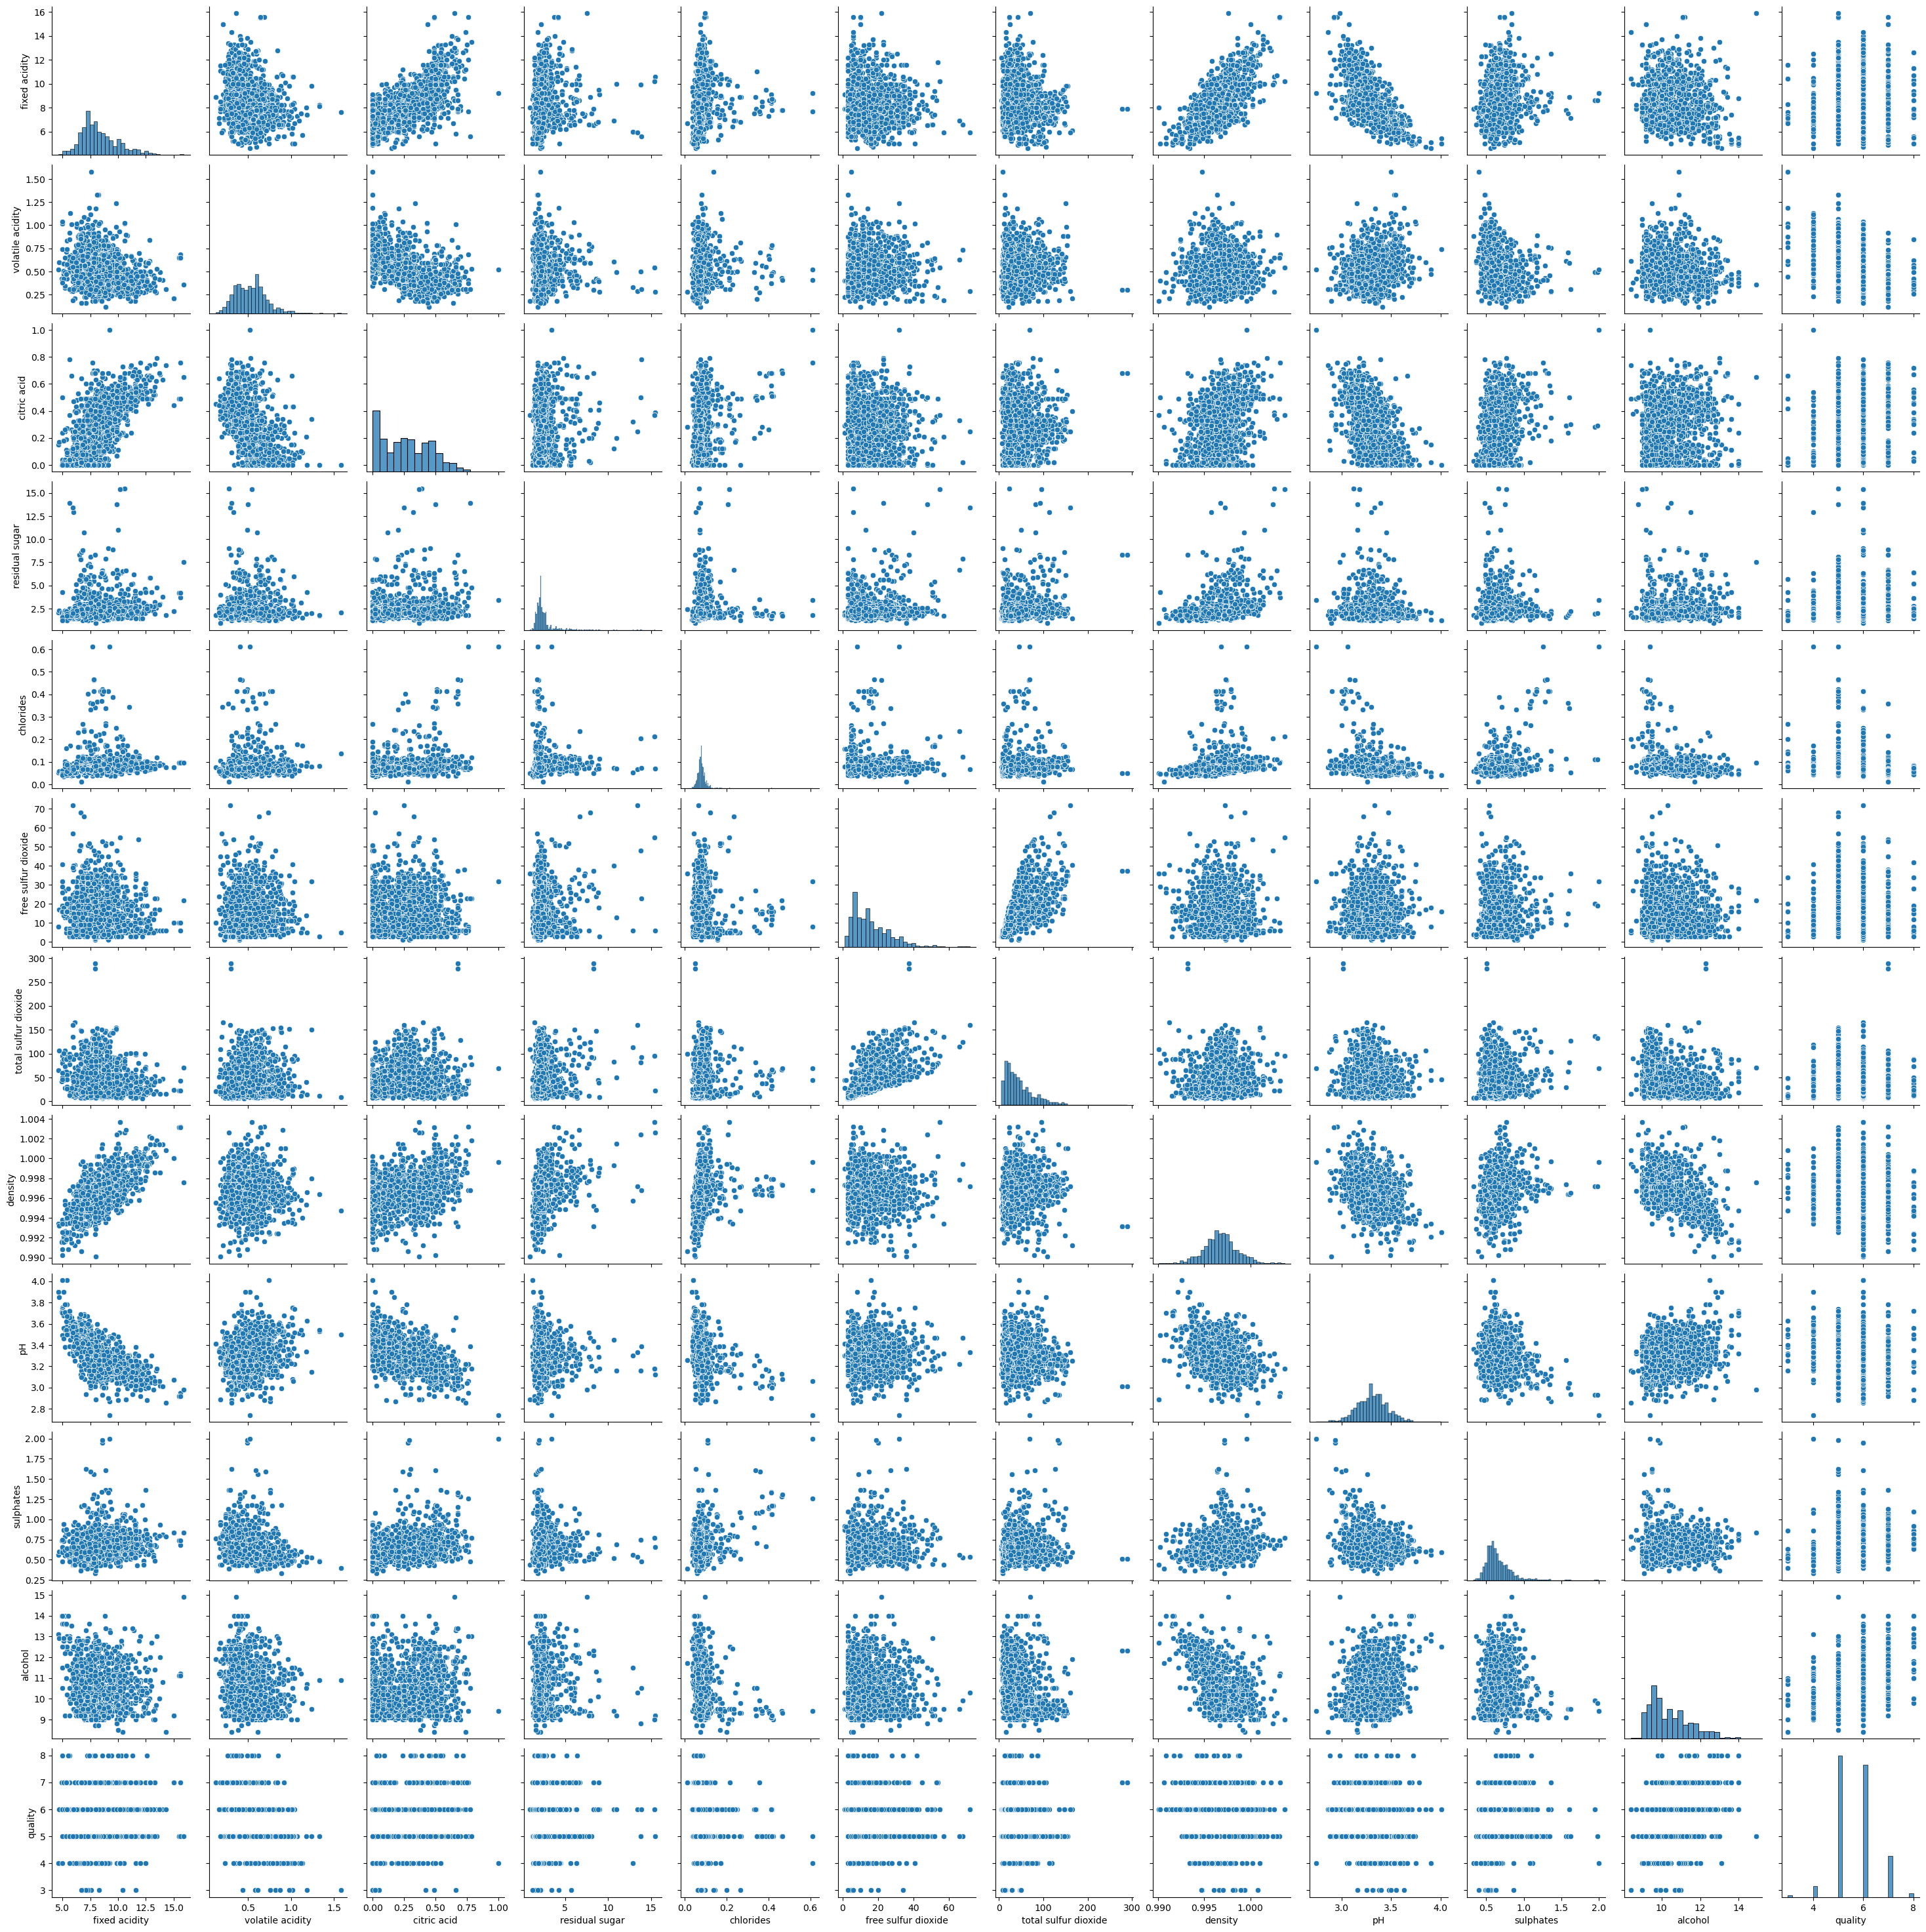

In [29]:
sns.pairplot(data=winedf)

Observations:

1. There is positive relation between fixed acidity and pH and  between fixed acidity and density

2. There is positive relation between the total sulfur dioxide and free sulfur dioxide

3. There is negative relation between pH and fixed acidity

4. Total sulfur oxide is left skewed 

5. The density and pH is well distributed


In [30]:
winedf.shape

(1599, 12)

# Removing outliers

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(winedf))
z

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.466193              0.379133  0.558274  1.288643   
1                0.872638              0.624363  0.028261  0.719933   
2                0.083669              0.229047  0.134264  0.331177   
3                0.107592              0.411500  0.664277  0.979104   
4                0.466193              0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054              0.075043  0.978765  0.899886   
1595             2.211469              0.137820  0.862162  1.353436   
1596             1.255161              0.196679  0.533554  0.705508   
1597             1.542054              0.075043  0.676657  1.677400   
1598             0.203223              0.135861  0.666057  0.511130   

      sulphates   alcohol   quality  
0      0.579207  0.960246  0.787823  
1      0.128950  0.584777  0.787823  
2      0.048089  0.584777  0.787823  
3      0.461180  0.584777  0.450848  
4      0.579207  0.960246  0.787823  
...         ...       ...       ...  
1594   0.461180  0.072294  0.787823  
1595   0.601055  0.729364  0.450848  
1596   0.542042  0.541630  0.450848  
1597   0.305990  0.209308  0.787823  
1598   0.010924  0.541630  0.450848  

[1599 rows x 12 columns]

In [32]:
threshold=3

print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [33]:
df_new=winedf[(z<3).all(axis=1)]
df_new

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1451 rows x 12 columns]

In [34]:
winedf.shape

(1599, 12)

In [35]:
df_new.shape

(1451, 12)

In [36]:
x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [37]:
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1451 rows x 11 columns]

In [38]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1451, dtype: int64

In [39]:
import sklearn 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.552930          1.050914    -1.390400       -0.565439  -0.258851   
1         -0.309900          2.119336    -1.390400        0.246832   0.790825   
2         -0.309900          1.407054    -1.180831       -0.101284   0.504550   
3          1.755851         -1.442071     1.543569       -0.565439  -0.306564   
4         -0.552930          1.050914    -1.390400       -0.565439  -0.258851   
...             ...               ...          ...             ...        ...   
1446      -1.282019          0.457346    -0.971261       -0.449401   0.409125   
1447      -1.464291          0.160562    -0.866477       -0.217323  -0.926828   
1448      -1.221261         -0.076865    -0.709300       -0.101284  -0.258851   
1449      -1.464291          0.724451    -0.761692       -0.449401  -0.306564   
1450      -1.403533         -1.264001     1.072038        1.407221  -0.688265   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.441060             -0.330784  0.635485  1.375896   
1                1.063255              0.790477  0.052390 -0.821951   
2               -0.011256              0.348768  0.169009 -0.396561   
3                0.203646              0.552634  0.752103 -1.105544   
4               -0.441060             -0.330784  0.635485  1.375896   
...                   ...                   ...       ...       ...   
1446             1.815413              0.008992 -1.055489  0.950506   
1447             2.567570              0.246835 -0.927209  1.446794   
1448             1.493059             -0.126918 -0.565690  0.737811   
1449             1.815413              0.008992 -0.723125  1.801286   
1450             0.311097             -0.058963 -0.711464  0.525116   

      sulphates   alcohol  
0     -0.636458 -0.999856  
1      0.288353 -0.608174  
2      0.057150 -0.608174  
3     -0.482323 -0.608174  
4     -0.636458 -0.999856  
...         ...       ...  
1446  -0.482323  0.077270  
1447   0.904894  0.762714  
1448   0.827826  0.566873  
1449   0.519556 -0.216491  
1450   0.134218  0.566873  

[1451 rows x 11 columns]

# VIF

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [41]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

VIF values              Features
0     7.942437         fixed acidity
1     1.861970      volatile acidity
2     3.191798           citric acid
3     1.653039        residual sugar
4     1.171792             chlorides
5     1.933500   free sulfur dioxide
6     2.185633  total sulfur dioxide
7     6.418063               density
8     3.214298                    pH
9     1.309630             sulphates
10    3.243686               alcohol

In [42]:
df_new.drop('fixed acidity',axis=1,inplace=True)

In [43]:
df_new

volatile acidity  citric acid  residual sugar  chlorides  \
0                0.700         0.00             1.9      0.076   
1                0.880         0.00             2.6      0.098   
2                0.760         0.04             2.3      0.092   
3                0.280         0.56             1.9      0.075   
4                0.700         0.00             1.9      0.076   
...                ...          ...             ...        ...   
1594             0.600         0.08             2.0      0.090   
1595             0.550         0.10             2.2      0.062   
1596             0.510         0.13             2.3      0.076   
1597             0.645         0.12             2.0      0.075   
1598             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1451 rows x 11 columns]

In [44]:
vif

VIF values              Features
0     7.942437         fixed acidity
1     1.861970      volatile acidity
2     3.191798           citric acid
3     1.653039        residual sugar
4     1.171792             chlorides
5     1.933500   free sulfur dioxide
6     2.185633  total sulfur dioxide
7     6.418063               density
8     3.214298                    pH
9     1.309630             sulphates
10    3.243686               alcohol

In [45]:
y.value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

# SMOTE

In [46]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
smt=SMOTE()
train_x,train_y=smt.fit_resample(x,y)


In [49]:
train_y.value_counts()

5    617
6    617
7    617
4    617
8    617
Name: quality, dtype: int64

# Modelling

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"at random_state",maxRS)

Best Accuracy is 0.8844492440604752 at random_state 141


In [52]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
etpred=ET.predict(x_test)
print('Accurayc Score:',accuracy_score(y_test,etpred))
print('Confusion Matrix:',confusion_matrix(y_test,etpred))
print('Classification_report:',classification_report(y_test,etpred))

Accurayc Score: 0.8639308855291576
Confusion Matrix: [[180   6   1   0   0]
 [  8 133  30   6   0]
 [  4  39 118  20   4]
 [  0   0   8 190   0]
 [  0   0   0   0 179]]
Classification_report:               precision    recall  f1-score   support

           4       0.94      0.96      0.95       187
           5       0.75      0.75      0.75       177
           6       0.75      0.64      0.69       185
           7       0.88      0.96      0.92       198
           8       0.98      1.00      0.99       179

    accuracy                           0.86       926
   macro avg       0.86      0.86      0.86       926
weighted avg       0.86      0.86      0.86       926



In [53]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtcpred=dtc.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,dtcpred))
print("Confusion matrix:",confusion_matrix(y_test,dtcpred))
print("Classification report:",classification_report(y_test,dtcpred))

Accuracy score: 0.7710583153347732
Confusion matrix: [[166  15   5   1   0]
 [ 16 106  45   9   1]
 [  9  40 102  28   6]
 [  1   6  12 171   8]
 [  0   0   3   7 169]]
Classification report:               precision    recall  f1-score   support

           4       0.86      0.89      0.88       187
           5       0.63      0.60      0.62       177
           6       0.61      0.55      0.58       185
           7       0.79      0.86      0.83       198
           8       0.92      0.94      0.93       179

    accuracy                           0.77       926
   macro avg       0.76      0.77      0.77       926
weighted avg       0.76      0.77      0.77       926



In [54]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knnpred=knn.predict(x_test)
print(accuracy_score(y_test,knnpred))
print(confusion_matrix(y_test,knnpred))
print(classification_report(y_test,knnpred))

0.775377969762419
[[183   4   0   0   0]
 [ 23 100  41  10   3]
 [ 18  38  84  32  13]
 [  0   2  15 173   8]
 [  0   0   0   1 178]]
              precision    recall  f1-score   support

           4       0.82      0.98      0.89       187
           5       0.69      0.56      0.62       177
           6       0.60      0.45      0.52       185
           7       0.80      0.87      0.84       198
           8       0.88      0.99      0.93       179

    accuracy                           0.78       926
   macro avg       0.76      0.77      0.76       926
weighted avg       0.76      0.78      0.76       926



In [55]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predrfc=RFC.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,predrfc))
print("Confsuion matrix:",confusion_matrix(y_test,predrfc))
print("Classification report:",classification_report(y_test,predrfc))

Accuracy score: 0.8390928725701944
Confsuion matrix: [[177   9   0   1   0]
 [  8 131  31   6   1]
 [  3  44 107  27   4]
 [  1   3   8 183   3]
 [  0   0   0   0 179]]
Classification report:               precision    recall  f1-score   support

           4       0.94      0.95      0.94       187
           5       0.70      0.74      0.72       177
           6       0.73      0.58      0.65       185
           7       0.84      0.92      0.88       198
           8       0.96      1.00      0.98       179

    accuracy                           0.84       926
   macro avg       0.83      0.84      0.83       926
weighted avg       0.83      0.84      0.83       926



In [56]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
lrpred=LR.predict(x_test)
print("Accuracy Score is:" ,accuracy_score(y_test,lrpred))
print("Confsuion matrix is:",confusion_matrix(y_test,lrpred))
print("Classification report is:",classification_report(y_test,lrpred))

Accuracy Score is: 0.5615550755939525
Confsuion matrix is: [[127  37  20   2   1]
 [ 41  90  38   6   2]
 [ 19  44  63  40  19]
 [  6   4  33  97  58]
 [  0   0   0  36 143]]
Classification report is:               precision    recall  f1-score   support

           4       0.66      0.68      0.67       187
           5       0.51      0.51      0.51       177
           6       0.41      0.34      0.37       185
           7       0.54      0.49      0.51       198
           8       0.64      0.80      0.71       179

    accuracy                           0.56       926
   macro avg       0.55      0.56      0.55       926
weighted avg       0.55      0.56      0.55       926



In [57]:
svc=SVC()
svc.fit(x_train,y_train)
svcpred=svc.predict(x_test)
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

0.7483801295896328
[[169  12   5   1   0]
 [ 22 109  38   5   3]
 [ 11  48  89  26  11]
 [  2   4  31 147  14]
 [  0   0   0   0 179]]
              precision    recall  f1-score   support

           4       0.83      0.90      0.86       187
           5       0.63      0.62      0.62       177
           6       0.55      0.48      0.51       185
           7       0.82      0.74      0.78       198
           8       0.86      1.00      0.93       179

    accuracy                           0.75       926
   macro avg       0.74      0.75      0.74       926
weighted avg       0.74      0.75      0.74       926



In [58]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
gbpred=GB.predict(x_test)
print(accuracy_score(y_test,gbpred))
print(confusion_matrix(y_test,gbpred))
print(classification_report(y_test,gbpred))

0.8056155507559395
[[171  12   3   1   0]
 [  6 131  33   6   1]
 [  5  50  97  29   4]
 [  0   2  19 168   9]
 [  0   0   0   0 179]]
              precision    recall  f1-score   support

           4       0.94      0.91      0.93       187
           5       0.67      0.74      0.70       177
           6       0.64      0.52      0.58       185
           7       0.82      0.85      0.84       198
           8       0.93      1.00      0.96       179

    accuracy                           0.81       926
   macro avg       0.80      0.81      0.80       926
weighted avg       0.80      0.81      0.80       926



In [59]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
abcpred=ABC.predict(x_test)
print(accuracy_score(y_test,abcpred))
print(confusion_matrix(y_test,abcpred))
print(classification_report(y_test,abcpred))

0.46652267818574517
[[156  14  15   2   0]
 [115  31  21   9   1]
 [ 56  39  38  44   8]
 [  6  23  28  88  53]
 [  0   3   9  48 119]]
              precision    recall  f1-score   support

           4       0.47      0.83      0.60       187
           5       0.28      0.18      0.22       177
           6       0.34      0.21      0.26       185
           7       0.46      0.44      0.45       198
           8       0.66      0.66      0.66       179

    accuracy                           0.47       926
   macro avg       0.44      0.46      0.44       926
weighted avg       0.44      0.47      0.44       926



# Cross Validation SCore

In [60]:
 from sklearn.model_selection import cross_val_score

In [61]:
score=cross_val_score(RFC,train_x,train_y)
print(score)
print(score.mean())
print(accuracy_score(y_test,predrfc)-score.mean())

[0.78444084 0.79740681 0.77633712 0.79416532 0.77795786]
0.7860615883306321
0.05303128423956227


In [62]:
score=cross_val_score(ET,train_x,train_y)
print(score)
print(score.mean())
print(accuracy_score(y_test,etpred)-score.mean())

[0.80551053 0.81199352 0.78119935 0.82009724 0.81685575]
0.807131280388979
0.05679960514017868


In [63]:
score=cross_val_score(LR,train_x,train_y)
print(score)
print(score.mean())
print("Accuracy score is:",accuracy_score(y_test,lrpred)-score.mean())

[0.55591572 0.53808752 0.56401945 0.52350081 0.52998379]
0.5423014586709887
Accuracy score is: 0.01925361692296379


In [64]:
score=cross_val_score(svc,train_x,train_y)
print(score)
print(score.mean())
print("Accuracy score is:",accuracy_score(y_test,svcpred)-score.mean())

[0.73743922 0.72447326 0.70016207 0.73095624 0.7439222 ]
0.727390599675851
Accuracy score is: 0.02098952991378189


In [65]:
score=cross_val_score(ABC,train_x,train_y)
print(score)
print(score.mean())
print("accuracy score is:",accuracy_score(y_test,abcpred)-score.mean())

[0.4165316  0.45705024 0.49594814 0.43111831 0.50243112]
0.4606158833063209
accuracy score is: 0.005906794879424249


ABC is our best model beacuse there is least difference between R2 score and the cross validation score

# Hypertuning Model

In [66]:
from sklearn.model_selection import GridSearchCV

parameters={'learning_rate':[0.01,0.1,0.5,1.0],
           'n_estimators':[50,100,200]}

In [67]:
GCV=GridSearchCV(ABC,parameters,cv=5,scoring='accuracy')

In [68]:
GCV.fit(train_x,train_y)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [69]:
print("Best Parameters:",GCV.best_params_)
print("Best Accuracy:",GCV.best_score_)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best Accuracy: 0.4936790923824959


In [70]:
final_model=AdaBoostClassifier(learning_rate=0.1,n_estimators=200,)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

49.0280777537797


# Saving the Model

In [71]:
import joblib
joblib.dump(final_model,'redwine-quality')

['redwine-quality']

In [72]:
model=joblib.load('redwine-quality')

#prediction

prediction=model.predict(x_test)
prediction

array([7, 4, 4, 8, 5, 6, 5, 8, 7, 5, 6, 4, 5, 6, 4, 6, 5, 6, 6, 6, 8, 7,
       6, 4, 7, 4, 8, 6, 7, 6, 5, 4, 6, 5, 6, 7, 8, 4, 4, 6, 4, 8, 8, 7,
       4, 8, 7, 8, 8, 4, 8, 4, 8, 6, 4, 7, 4, 5, 5, 7, 8, 6, 7, 7, 6, 4,
       4, 6, 4, 7, 6, 7, 7, 8, 7, 7, 8, 4, 8, 6, 7, 6, 8, 5, 4, 5, 4, 6,
       6, 7, 8, 7, 4, 4, 8, 6, 6, 7, 4, 8, 4, 7, 6, 7, 4, 4, 4, 4, 4, 4,
       4, 5, 7, 8, 7, 7, 7, 7, 6, 7, 7, 6, 7, 4, 8, 7, 5, 6, 8, 7, 6, 5,
       4, 7, 6, 4, 6, 6, 4, 4, 8, 4, 7, 6, 4, 4, 6, 6, 4, 8, 7, 6, 4, 4,
       5, 5, 4, 8, 8, 8, 4, 7, 7, 7, 8, 5, 5, 7, 8, 8, 5, 5, 4, 5, 8, 4,
       4, 7, 4, 7, 6, 6, 7, 8, 5, 6, 6, 7, 7, 8, 5, 5, 4, 7, 6, 7, 4, 6,
       6, 7, 7, 6, 8, 8, 4, 7, 6, 6, 4, 4, 7, 7, 7, 7, 4, 4, 4, 7, 4, 8,
       5, 4, 7, 4, 7, 7, 7, 6, 7, 4, 4, 5, 5, 4, 6, 5, 6, 4, 7, 4, 6, 5,
       6, 4, 4, 7, 5, 4, 6, 5, 7, 7, 5, 5, 6, 8, 6, 7, 6, 4, 7, 7, 7, 5,
       6, 6, 4, 4, 5, 7, 8, 7, 4, 8, 6, 4, 7, 4, 7, 5, 8, 8, 6, 4, 6, 7,
       7, 7, 7, 6, 4, 4, 8, 7, 4, 8, 4, 4, 8, 8, 6,

In [73]:
b=np.array(y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=b
df

Predicted  Original
0            7         7
1            4         4
2            4         4
3            8         8
4            5         4
..         ...       ...
921          8         7
922          7         7
923          4         4
924          8         8
925          4         5

[926 rows x 2 columns]

# 2. Medical Insurance Cost

Creating a model which will predict the medical cost of the patinets using the dataset.

1. In this data we will perform the EDA of the data.

2. Data Cleaning,Feature engineering, removing outliers

3. Creating model

4. Hypertuning the model and saving the model

In [74]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [75]:
#Dataframe
df1=pd.read_csv('insurance.csv')
df1

age     sex     bmi  children smoker     region  medicalCost
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [76]:
df1.shape

(1338, 7)

We can see there are 13338 rows and 7 columns are there in our dataset

In [77]:
df1.isnull()

age    sex    bmi  children  smoker  region  medicalCost
0     False  False  False     False   False   False        False
1     False  False  False     False   False   False        False
2     False  False  False     False   False   False        False
3     False  False  False     False   False   False        False
4     False  False  False     False   False   False        False
...     ...    ...    ...       ...     ...     ...          ...
1333  False  False  False     False   False   False        False
1334  False  False  False     False   False   False        False
1335  False  False  False     False   False   False        False
1336  False  False  False     False   False   False        False
1337  False  False  False     False   False   False        False

[1338 rows x 7 columns]

<Axes: >

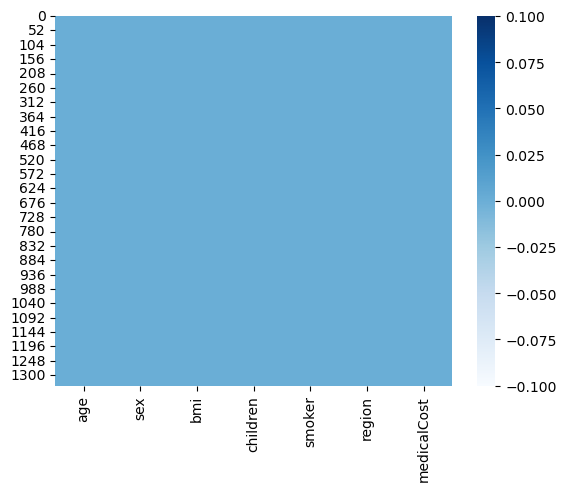

In [78]:
sns.heatmap(df1.isnull(),cmap='Blues')

There are no null values in dataset

In [79]:
df1.isnull().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
medicalCost    0
dtype: int64

In [80]:
df1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'medicalCost'], dtype='object')

There are seven columns in dataset namely age, sex, bmi, children, smoker, region and medicalcost

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   medicalCost  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the info we can observed that the age and children contains-integer values

2. Sex, smoker, region contains- Object values

3. Bmi and medicalcost contains-Float values

In [82]:
df1.describe()

age          bmi     children   medicalCost
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

From the statistical summary we can see the following points-

1.Mean is greater than the median so it means leftside skewness is there

2. The max value is large than the 75% it mean outliers are present in data we can confirm for the outliers from box plot

In [83]:
df1.medicalCost.nunique

<bound method IndexOpsMixin.nunique of 0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: medicalCost, Length: 1338, dtype: float64>

In [84]:
df1.medicalCost.value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: medicalCost, Length: 1337, dtype: int64

In [85]:
for i in df1.columns:
    print(df1[i].value_counts())
    print('\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [86]:
numerical_col=[]
for i in df1.dtypes.index:
    if df1.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)

Numerical Columns: ['age', 'bmi', 'children', 'medicalCost']


Univariate Analysis

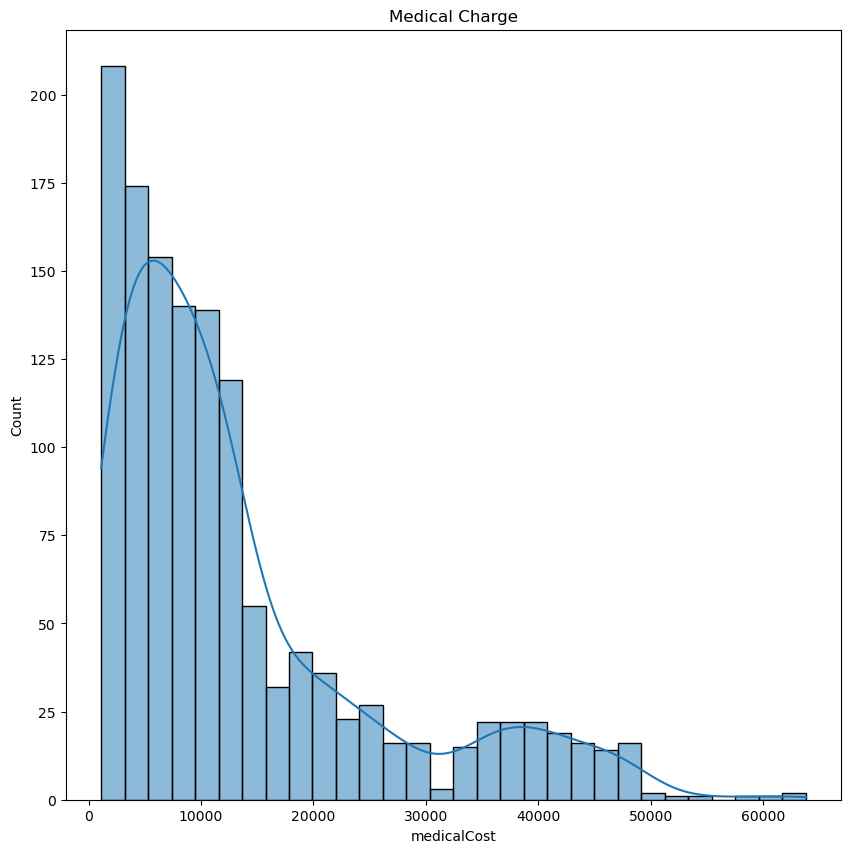

In [87]:
plt.figure(figsize=(10,10))
sns.histplot(df1['medicalCost'],kde=True)
plt.title('Medical Charge')
plt.show()

The graph is left side skewed for the medicalcost

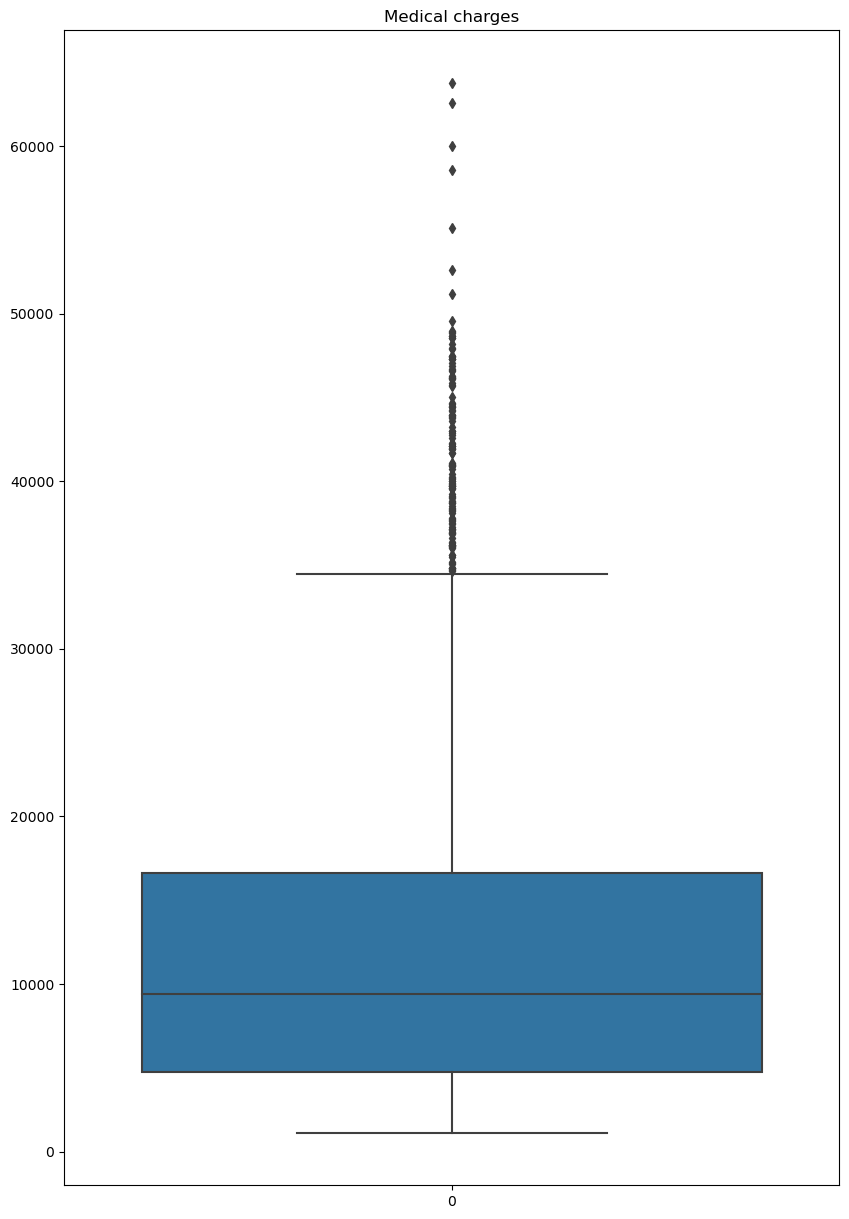

In [88]:
plt.figure(figsize=(10,15))
sns.boxplot(df1['medicalCost'])
plt.title('Medical charges')
plt.show()

The oulers are present in the medicalcost

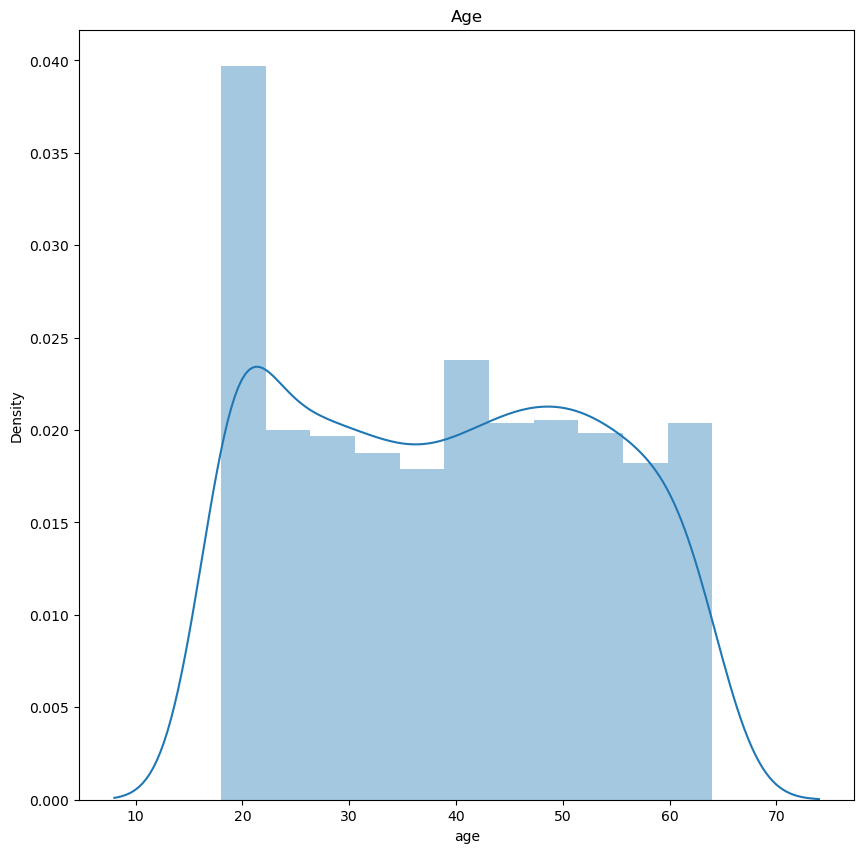

In [89]:
plt.figure(figsize=(10,10))
sns.distplot(df1['age'])
plt.title('Age')
plt.show()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: medicalCost, Length: 1337, dtype: int64


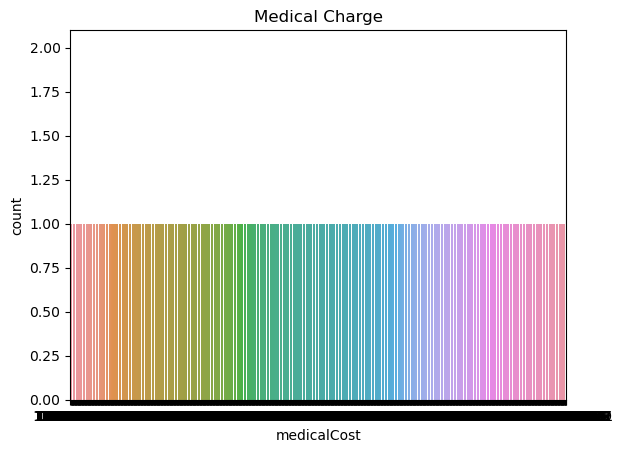

In [90]:
print(df1['medicalCost'].value_counts())
sns.countplot(data=df1,x='medicalCost')
plt.title('Medical Charge')
plt.show()

age               Axes(0.125,0.53;0.352273x0.35)
bmi            Axes(0.547727,0.53;0.352273x0.35)
children          Axes(0.125,0.11;0.352273x0.35)
medicalCost    Axes(0.547727,0.11;0.352273x0.35)
dtype: object

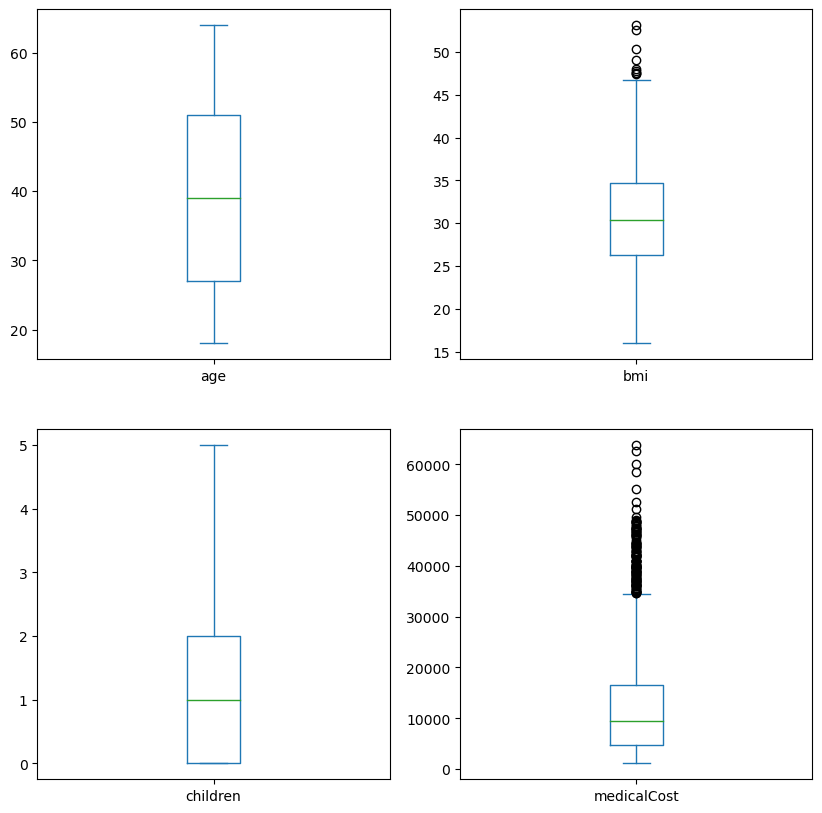

In [91]:
df1.plot(kind='box',subplots=True,layout=(2,2),figsize=(10,10))

From the boxplot we can observed that the outliers are present in the bmmi and medicalcost and we can remove the outliers by using zscore.

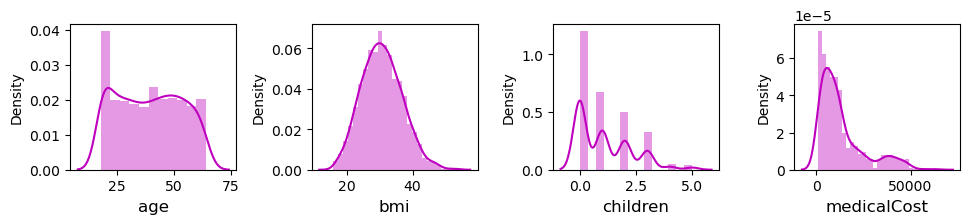

In [92]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in  numerical_col:
    if plotnumber<=7:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df1[col],color='m')
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

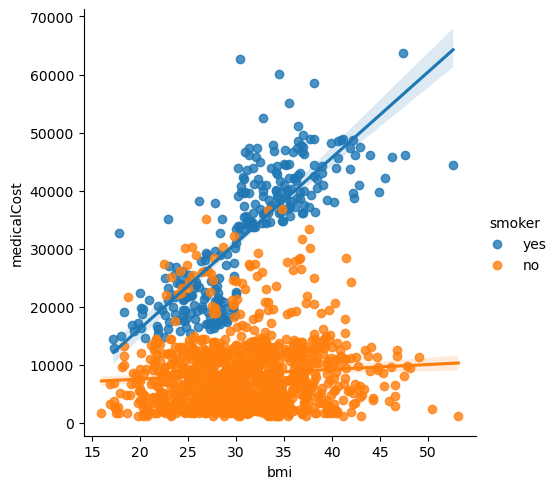

In [93]:
sns.lmplot(x='bmi',y='medicalCost',hue='smoker',data=df1)

From the graph we can observe the medical cost increases for the patients whose is smoker with increase in bmi value

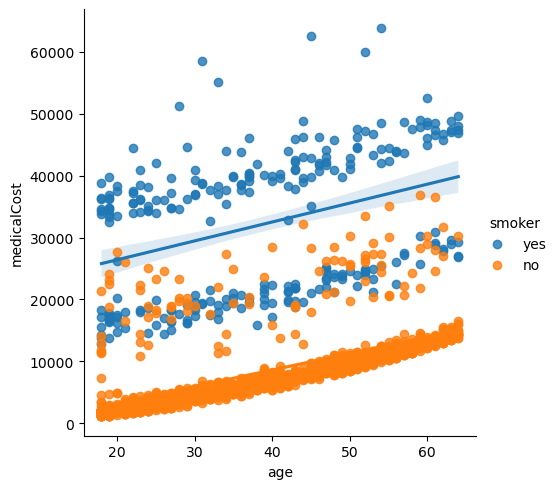

In [94]:
sns.lmplot(data=df1,x='age',y='medicalCost',hue='smoker')

From graph we can see the medical cost is more in the older aptient specially whose is smoking

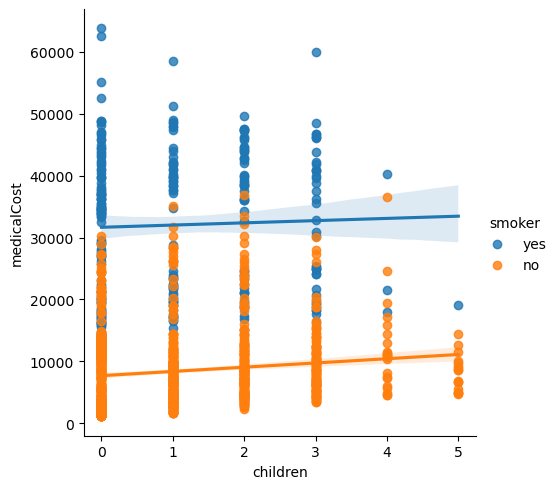

In [95]:
sns.lmplot(x='children',y='medicalCost',hue='smoker',data=df1)

1.Overall smoking has high impact on increasing medicalcost with increase in value of bmi and age

2. There is no as such direct relation with children beacuse they smoke less.

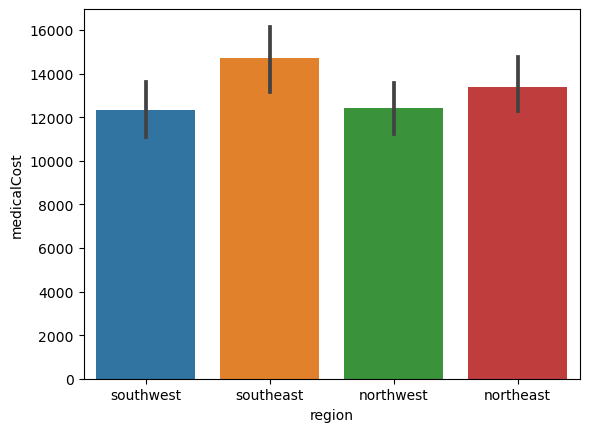

In [96]:

sns.barplot(x='region',y='medicalCost',data=df1)
plt.show()

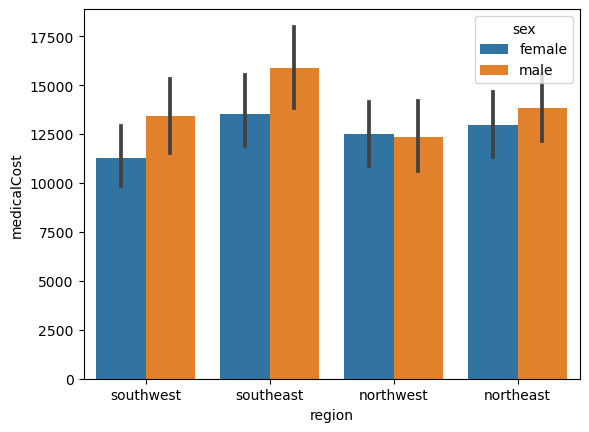

In [97]:

sns.barplot(x='region',y='medicalCost', hue='sex',data=df1)
plt.show()

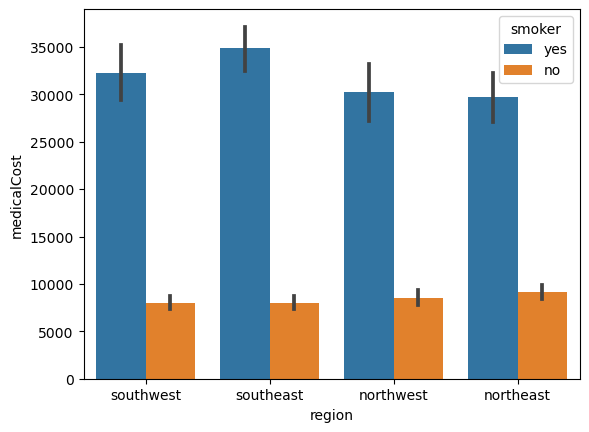

In [98]:

sns.barplot(x='region',y='medicalCost', hue='smoker',data=df1)
plt.show()

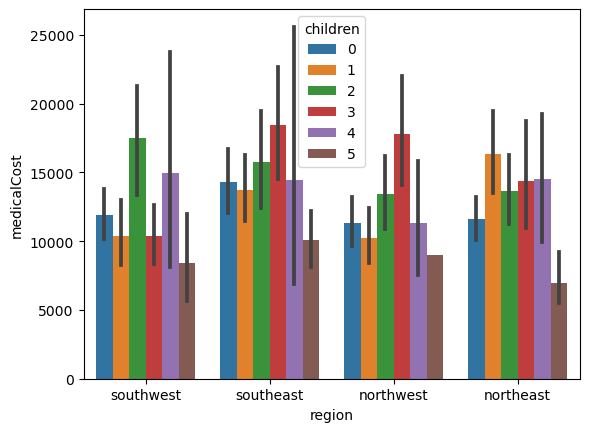

In [99]:

sns.barplot(x='region',y='medicalCost', hue='children',data=df1)
plt.show()

From graphs we can obsereved medical cost is higher in southeast region.
People in southeast region smoke more
People who have children have overall more medicalcost

<Axes: xlabel='age', ylabel='medicalCost'>

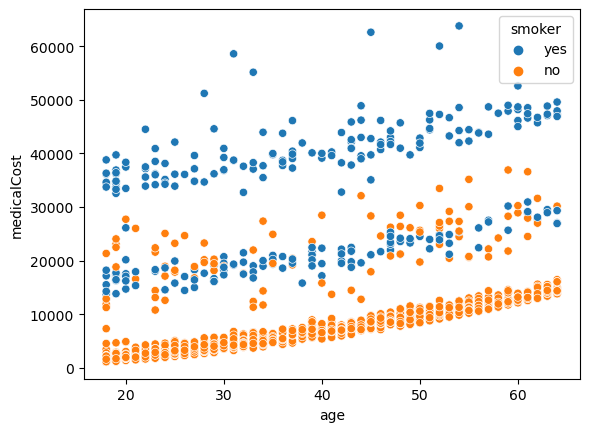

In [100]:
sns.scatterplot(x='age',y='medicalCost',hue='smoker',data=df1)

<Axes: xlabel='sex', ylabel='medicalCost'>

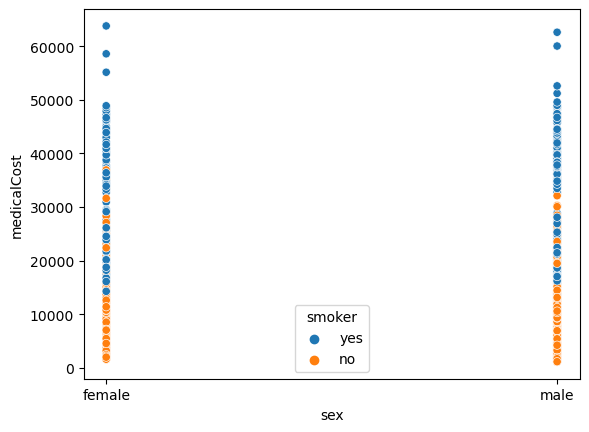

In [101]:
sns.scatterplot(x='sex',y='medicalCost',hue='smoker',data=df1)

From scatterplots we can obserevd that the in people the medicalcost is increasing whose is smoking.
And the medicalcost is higher in the people whose age is more in addition they are smoker as well.

In [102]:
df1[['sex','smoker','region']]=df1[['sex','smoker','region']].astype('category')

In [103]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

le.fit(df1.sex)
df1.sex=le.transform(df1.sex)

le.fit(df1.smoker)
df1.smoker=le.transform(df1.smoker)

le.fit(df1.region)
df1.region=le.transform(df1.region)

df1.dtypes

age              int64
sex              int32
bmi            float64
children         int64
smoker           int32
region           int32
medicalCost    float64
dtype: object

In [104]:
df1.corr()

age       sex       bmi  children    smoker    region  \
age          1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127   
sex         -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588   
bmi          0.109272  0.046371  1.000000  0.012759  0.003750  0.157566   
children     0.042469  0.017163  0.012759  1.000000  0.007673  0.016569   
smoker      -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181   
region       0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000   
medicalCost  0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208   

             medicalCost  
age             0.299008  
sex             0.057292  
bmi             0.198341  
children        0.067998  
smoker          0.787251  
region         -0.006208  
medicalCost     1.000000

<Axes: >

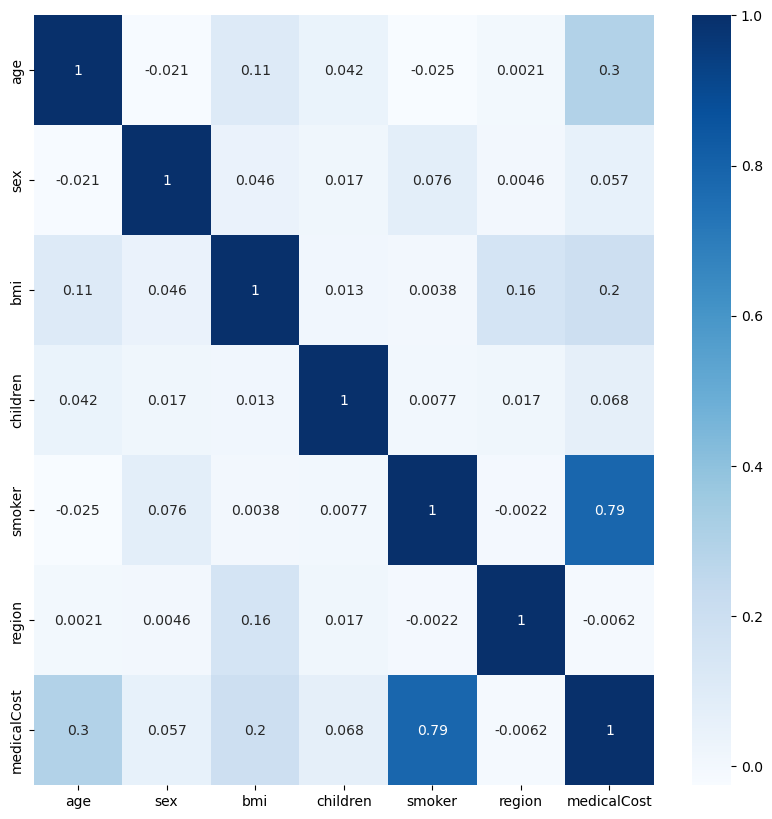

In [105]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True,cmap='Blues')

1. The children and smoker are positively correlated with each other.

2.The smoker and region are negatively correlated with eachother.

3. The smoker imapct more values to medical cost

4. The region added very less values to medical cost

In [106]:
df1

age  sex     bmi  children  smoker  region  medicalCost
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]

In [107]:
df1['region'].unique()

array([3, 2, 1, 0])

In [108]:
from scipy.stats import zscore

In [109]:
z=np.abs(zscore(df1))
z

age       sex       bmi  children    smoker    region  medicalCost
0     1.438764  1.010519  0.453320  0.908614  1.970587  1.343905     0.298584
1     1.509965  0.989591  0.509621  0.078767  0.507463  0.438495     0.953689
2     0.797954  0.989591  0.383307  1.580926  0.507463  0.438495     0.728675
3     0.441948  0.989591  1.305531  0.908614  0.507463  0.466915     0.719843
4     0.513149  0.989591  0.292556  0.908614  0.507463  0.466915     0.776802
...        ...       ...       ...       ...       ...       ...          ...
1333  0.768473  0.989591  0.050297  1.580926  0.507463  0.466915     0.220551
1334  1.509965  1.010519  0.206139  0.908614  0.507463  1.372326     0.914002
1335  1.509965  1.010519  1.014878  0.908614  0.507463  0.438495     0.961596
1336  1.296362  1.010519  0.797813  0.908614  0.507463  1.343905     0.930362
1337  1.551686  1.010519  0.261388  0.908614  1.970587  0.466915     1.311053

[1338 rows x 7 columns]

In [110]:
threshold=3
print(np.where(z>3))

df2=df1[(z<3).all(axis=1)]
df2

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


age  sex     bmi  children  smoker  region  medicalCost
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1309 rows x 7 columns]

In [111]:
df2.shape

(1309, 7)

Removed outliers using zscore

In [112]:
df1.shape

(1338, 7)

In [113]:
df1.skew()

age            0.055673
sex           -0.020951
bmi            0.284047
children       0.938380
smoker         1.464766
region        -0.038101
medicalCost    1.515880
dtype: float64

In [114]:
df1['medicalCost']=np.cbrt(df1['medicalCost'])

In [115]:
df1.skew()

age            0.055673
sex           -0.020951
bmi            0.284047
children       0.938380
smoker         1.464766
region        -0.038101
medicalCost    0.515183
dtype: float64

In [116]:
x=df2.iloc[:,0:-1]
x

age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1309 rows x 6 columns]

In [117]:
y=df2.iloc[:,-1]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: medicalCost, Length: 1309, dtype: float64

In [118]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x

age       sex       bmi  children    smoker    region
0    -1.439063 -1.005362 -0.449359 -0.929616  1.984848  1.352753
1    -1.510086  0.994667  0.533391 -0.040093 -0.503817  0.447460
2    -0.799859  0.994667  0.404478  1.738954 -0.503817  0.447460
3    -0.444746  0.994667 -1.319101 -0.929616 -0.503817 -0.457833
4    -0.515769  0.994667 -0.285288 -0.929616 -0.503817 -0.457833
...        ...       ...       ...       ...       ...       ...
1304  0.762639  0.994667  0.064617  1.738954 -0.503817 -0.457833
1305 -1.510086 -1.005362  0.223666 -0.929616 -0.503817 -1.363127
1306 -1.510086 -1.005362  1.049041 -0.929616 -0.503817  0.447460
1307 -1.297018 -1.005362 -0.800939 -0.929616 -0.503817  1.352753
1308  1.543888 -1.005362 -0.253479 -0.929616  1.984848 -0.457833

[1309 rows x 6 columns]

# VIF

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns

vif

VIF values  Features
0    1.019082       age
1    1.008815       sex
2    1.043841       bmi
3    1.005176  children
4    1.007983    smoker
5    1.026656    region

There is no multicolinearlity present in the data

# Modelling

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"at random_state",maxRS)

Best Accuracy is 0.8163956888560486 at random_state 27


In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=maxRS,test_size=0.30)

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import LinearRegression


In [124]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
pred1=LR.predict(x_train)
print("R2 score:",r2_score(y_test,pred))
print("R2 score on train data:",r2_score(y_train,pred1)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))


R2 score: 0.8163956888560486
R2 score on train data: 72.38854306117616
Mean absolute error: 3779.4309941230854
Mean squared error: 25743369.30524331
Root mean squared error: 5073.792398713541


In [125]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
pred1=RF.predict(x_train)
print("R2 score:",r2_score(y_test,pred))
print("R2 score on train data:",r2_score(y_train,pred1)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))


R2 score: 0.9058488137032443
R2 score on train data: 97.2818705583119
Mean absolute error: 2140.2262395178127
Mean squared error: 13201044.922435595
Root mean squared error: 3633.3242247885883


In [126]:
KN=KNN()
KN.fit(x_train,y_train)
pred=KN.predict(x_test)
pred1=KN.predict(x_train)
print("R2 score:",r2_score(y_test,pred))
print("R2 score on train data:",r2_score(y_train,pred1)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))


R2 score: 0.8775827646724643
R2 score on train data: 84.4547409810903
Mean absolute error: 2713.4584679414756
Mean squared error: 17164259.80810882
Root mean squared error: 4142.97716722031


In [127]:
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)
pred=GB.predict(x_test)
pred1=GB.predict(x_train)
print("R2 score:",r2_score(y_test,pred))
print("R2 score on train data:",r2_score(y_train,pred1)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))


R2 score: 0.9179580008791496
R2 score on train data: 88.23247988431768
Mean absolute error: 2084.719284014974
Mean squared error: 11503202.014971202
Root mean squared error: 3391.6370700549905


In [128]:
LS=Lasso()
LS.fit(x_train,y_train)
pred=LS.predict(x_test)
pred1=LS.predict(x_train)
print("R2 score:",r2_score(y_test,pred))
print("R2 score on train data:",r2_score(y_train,pred1)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))


R2 score: 0.8163895454880018
R2 score on train data: 72.38853846348161
Mean absolute error: 3779.367639974441
Mean squared error: 25744230.673864905
Root mean squared error: 5073.877282105363


In [129]:
RD=Ridge()
RD.fit(x_train,y_train)
pred=RD.predict(x_test)
pred1=RD.predict(x_train)
print("R2 score:",r2_score(y_test,pred))
print("R2 score on train data:",r2_score(y_train,pred1)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))


R2 score: 0.8163104433411097
R2 score on train data: 72.38845328685264
Mean absolute error: 3781.271062388362
Mean squared error: 25755321.675854962
Root mean squared error: 5074.970115759793


In [130]:
from sklearn.svm import SVR
SV=SVR()
SV.fit(x_train,y_train)
pred=SV.predict(x_test)
pred1=SV.predict(x_train)
print("R2 score:",r2_score(y_test,pred))
print("R2 score on train data:",r2_score(y_train,pred1)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))


R2 score: -0.05252297700992403
R2 score on train data: -9.666316688548937
Mean absolute error: 8039.744863193482
Mean squared error: 147575443.7932392
Root mean squared error: 12148.063376243936


In [131]:
from sklearn.ensemble import ExtraTreesRegressor
ET=ExtraTreesRegressor()
ET.fit(x_train,y_train)
pred=ET.predict(x_test)
pred1=ET.predict(x_train)
print("R2 score:",r2_score(y_test,pred))
print("R2 score on train data:",r2_score(y_train,pred1)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))


R2 score: 0.8778600380553649
R2 score on train data: 100.0
Mean absolute error: 2182.892053364123
Mean squared error: 17125382.991709176
Root mean squared error: 4138.2826138036025


In [132]:

DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
pred=DT.predict(x_test)
pred1=DT.predict(x_train)
print("R2 score:",r2_score(y_test,pred))
print("R2 score on train data:",r2_score(y_train,pred1)*100)
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))


R2 score: 0.7122502976618061
R2 score on train data: 100.0
Mean absolute error: 2943.5829128727737
Mean squared error: 40345713.06421091
Root mean squared error: 6351.8275373478855


In [133]:
from sklearn.model_selection import cross_val_score

In [134]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between r2 and cross validation',(r2_score(y_test,pred)- score.mean())*100)

[0.76337332 0.71273583 0.78072916 0.73045788 0.76622267]
0.7507037701961409
Difference between r2 and cross validation -3.845347253433473


In [135]:
score=cross_val_score(RF,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between r2 and cross validation',(r2_score(y_test,pred)- score.mean())*100)

[0.85421048 0.7831484  0.85441754 0.83292254 0.85378944]
0.8356976789582117
Difference between r2 and cross validation -12.344738129640554


In [136]:
score=cross_val_score(KN,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between r2 and cross validation',(r2_score(y_test,pred)- score.mean())*100)

[0.83079348 0.7715433  0.82598029 0.79640205 0.82468182]
0.8098801911996685
Difference between r2 and cross validation -9.762989353786233


In [137]:
score=cross_val_score(GB,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between r2 and cross validation',(r2_score(y_test,pred)- score.mean())*100)

[0.87801961 0.80500612 0.88385392 0.84559096 0.8638385 ]
0.8552618197460454
Difference between r2 and cross validation -14.301152208423929


In [138]:
score=cross_val_score(LS,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between r2 and cross validation',(r2_score(y_test,pred)- score.mean())*100)

[0.76337505 0.71275985 0.7807142  0.73045566 0.76622802]
0.7507065591488712
Difference between r2 and cross validation -3.8456261487065047


In [139]:
score=cross_val_score(RD,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between r2 and cross validation',(r2_score(y_test,pred)- score.mean())*100)

[0.7633537  0.71279257 0.78063397 0.73052688 0.76622221]
0.750705866775889
Difference between r2 and cross validation -3.8455569114082877


In [140]:
score=cross_val_score(SV,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between r2 and cross validation',(r2_score(y_test,pred)- score.mean())*100)

[-0.10950253 -0.10909091 -0.06727152 -0.09799697 -0.10077012]
-0.09692641002300766
Difference between r2 and cross validation 80.91767076848137


In [141]:
score=cross_val_score(ET,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between r2 and cross validation',(r2_score(y_test,pred)- score.mean())*100)

[0.83396784 0.75942043 0.8327568  0.81171663 0.83801532]
0.8151754066597778
Difference between r2 and cross validation -10.292510899797168


In [142]:
score=cross_val_score(DT,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('Difference between r2 and cross validation',(r2_score(y_test,pred)- score.mean())*100)

[0.7830681  0.65020422 0.61896797 0.72318887 0.64370305]
0.6838264422815884
Difference between r2 and cross validation 2.8423855380217744


Our best model is GradientBosstingRegressor beacuse there is least difference between thenR2 score and cross validation score

# Hypertunning the Model

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
param_grid={'n_estimators':[100,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] }

gcv=GridSearchCV(GradientBoostingRegressor(),param_grid,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.02], 'max_depth': [4],
                         'max_features': [1.0], 'min_samples_leaf': [3],
                         'n_estimators': [100, 500]})

In [145]:
gcv.best_params_

{'learning_rate': 0.05,
 'max_depth': 4,
 'max_features': 1.0,
 'min_samples_leaf': 3,
 'n_estimators': 100}

In [146]:
Model=GradientBoostingRegressor(learning_rate= 0.05,
 max_depth= 4,
 max_features= 1.0,
 min_samples_leaf= 3,
 n_estimators=100)

In [147]:
Model.fit(x_train,y_train)
pred2=Model.predict(x_test)
print("R2_score",r2_score(y_test,pred2))
print("Mean absolute error",mean_absolute_error(y_test,pred2))
print("Mean squared error",mean_squared_error(y_test,pred2))
print("Root mean squared error",np.sqrt(mean_squared_error(y_test,pred2)))

R2_score 0.9236526879505649
Mean absolute error 2065.09804275909
Mean squared error 10704743.463296447
Root mean squared error 3271.8104259410334


# Saving the Model

In [148]:
import pickle
filename='Medical-cost'
pickle.dump(Model,open(filename,'wb'))

In [149]:
import pickle
load_model=pickle.load(open('Medical-cost','rb'))
result=load_model.score(x_test,y_test)
print(result*100)

92.3652687950565


In [150]:
Result=pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
Result

0            1             2             3    \
Predicted  17162.119293  6716.885042  40938.429653  43248.844728   
Original   16085.127500  3292.529850  41919.097000  44260.749900   

                    4             5            6             7            8    \
Predicted  10409.833057  10762.872369  4449.247361  10320.642093  5957.961894   
Original    9866.304850   8827.209900  2219.445100   7726.854000  2362.229050   

                  9    ...           383          384           385  \
Predicted  6916.32855  ...  10987.182735  2337.762484  12954.161246   
Original   4738.26820  ...   9861.025000  1704.700150   9504.310300   

                   386           387           388           389  \
Predicted  5309.875488  39608.535331  13406.687642  13405.357233   
Original   2899.489350  42112.235600  10355.641000  11082.577200   

                    390           391          392  
Predicted  34515.381339  18971.590002  6019.196638  
Original   34838.873000  12347.172000  4670.640000  

[2 rows x 393 columns]